# 와인 분류

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [2]:
data = pd.read_csv('wine_train.csv')

In [3]:
data.shape

(5497, 14)

In [4]:
data[:3]

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white


In [5]:
data['quality'].value_counts()

6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: quality, dtype: int64

In [6]:
data.type

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object

In [7]:
data['type'] = np.where(data['type'] == 'white', 1, 0).astype('int')
## 데이터 타입이 화이트면 1, 아니면 0 인 int형으로 변환

In [8]:
data.type.value_counts()

1    4159
0    1338
Name: type, dtype: int64

In [9]:
from tensorflow.keras.utils import to_categorical

딥러닝 기본에서는 targetd이 명목형인 경우, dummy로 만들어 주어야 한다.(one-hot인코딩)

In [10]:
y_data = to_categorical(data['quality'] - 3)
y_data[:3] # target

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [11]:
X_data = data.loc[:, 'fixed acidity':]
X_data[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1


## Min_Max 스케일링

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_data)
X_data_scaled = scaler.fit_transform(X_data)

In [14]:
X_data_scaled[:3]

array([[0.14876033, 0.41      , 0.03614458, 0.09509202, 0.05490849,
        0.02777778, 0.1797235 , 0.13900135, 0.5511811 , 0.12359551,
        0.31884058, 1.        ],
       [0.41322314, 0.35333333, 0.08433735, 0.02760736, 0.09650582,
        0.03125   , 0.08294931, 0.18874108, 0.35433071, 0.20786517,
        0.2173913 , 0.        ],
       [0.33884298, 0.08666667, 0.23493976, 0.02147239, 0.07986689,
        0.06944444, 0.30414747, 0.08964719, 0.24409449, 0.16853933,
        0.42028986, 1.        ]])

# train / test data 분리

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data, 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=100)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4397, 12) (4397, 7)
(1100, 12) (1100, 7)


## 모델생성
## 심층 신경망 모델

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [42]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=12))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [48]:
## 이 모델로 설정을 하겠음(compile)
## 이 모델로 설정을 하겠음(compile)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc', 'mae']
             )

In [49]:
#
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1664      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
 dense_9 (Dense)             (None, 7)                 77        
                                                                 
Total params: 12,407
Trainable params: 12,407
Non-trainable params: 0
_________________________________________________________________


In [50]:
history = model.fit(X_train, y_train, epochs=200, batch_size=50, verbose=2)
history

Epoch 1/200
88/88 - 0s - loss: 0.7568 - acc: 0.6743 - mae: 0.1255 - 338ms/epoch - 4ms/step
Epoch 2/200
88/88 - 0s - loss: 0.7406 - acc: 0.6816 - mae: 0.1238 - 58ms/epoch - 657us/step
Epoch 3/200
88/88 - 0s - loss: 0.7409 - acc: 0.6782 - mae: 0.1241 - 60ms/epoch - 680us/step
Epoch 4/200
88/88 - 0s - loss: 0.7396 - acc: 0.6927 - mae: 0.1232 - 59ms/epoch - 669us/step
Epoch 5/200
88/88 - 0s - loss: 0.7431 - acc: 0.6807 - mae: 0.1237 - 60ms/epoch - 680us/step
Epoch 6/200
88/88 - 0s - loss: 0.7386 - acc: 0.6864 - mae: 0.1230 - 61ms/epoch - 691us/step
Epoch 7/200
88/88 - 0s - loss: 0.7345 - acc: 0.6905 - mae: 0.1228 - 59ms/epoch - 669us/step
Epoch 8/200
88/88 - 0s - loss: 0.7315 - acc: 0.6902 - mae: 0.1224 - 59ms/epoch - 669us/step
Epoch 9/200
88/88 - 0s - loss: 0.7428 - acc: 0.6830 - mae: 0.1231 - 59ms/epoch - 669us/step
Epoch 10/200
88/88 - 0s - loss: 0.7290 - acc: 0.6907 - mae: 0.1220 - 59ms/epoch - 669us/step
Epoch 11/200
88/88 - 0s - loss: 0.7276 - acc: 0.6918 - mae: 0.1211 - 60ms/epoch 

Epoch 90/200
88/88 - 0s - loss: 0.6008 - acc: 0.7555 - mae: 0.1012 - 59ms/epoch - 669us/step
Epoch 91/200
88/88 - 0s - loss: 0.6080 - acc: 0.7476 - mae: 0.1027 - 64ms/epoch - 725us/step
Epoch 92/200
88/88 - 0s - loss: 0.5986 - acc: 0.7505 - mae: 0.1005 - 65ms/epoch - 737us/step
Epoch 93/200
88/88 - 0s - loss: 0.6011 - acc: 0.7567 - mae: 0.1002 - 65ms/epoch - 737us/step
Epoch 94/200
88/88 - 0s - loss: 0.5951 - acc: 0.7528 - mae: 0.1013 - 66ms/epoch - 748us/step
Epoch 95/200
88/88 - 0s - loss: 0.5892 - acc: 0.7578 - mae: 0.1000 - 66ms/epoch - 748us/step
Epoch 96/200
88/88 - 0s - loss: 0.5985 - acc: 0.7498 - mae: 0.1004 - 60ms/epoch - 680us/step
Epoch 97/200
88/88 - 0s - loss: 0.6010 - acc: 0.7585 - mae: 0.1012 - 60ms/epoch - 680us/step
Epoch 98/200
88/88 - 0s - loss: 0.5889 - acc: 0.7576 - mae: 0.0997 - 66ms/epoch - 748us/step
Epoch 99/200
88/88 - 0s - loss: 0.5973 - acc: 0.7521 - mae: 0.1005 - 69ms/epoch - 782us/step
Epoch 100/200
88/88 - 0s - loss: 0.5924 - acc: 0.7551 - mae: 0.0997 - 

Epoch 178/200
88/88 - 0s - loss: 0.4941 - acc: 0.7992 - mae: 0.0838 - 59ms/epoch - 667us/step
Epoch 179/200
88/88 - 0s - loss: 0.4734 - acc: 0.8119 - mae: 0.0810 - 60ms/epoch - 680us/step
Epoch 180/200
88/88 - 0s - loss: 0.4840 - acc: 0.8094 - mae: 0.0814 - 59ms/epoch - 669us/step
Epoch 181/200
88/88 - 0s - loss: 0.4927 - acc: 0.7999 - mae: 0.0828 - 59ms/epoch - 669us/step
Epoch 182/200
88/88 - 0s - loss: 0.4950 - acc: 0.7990 - mae: 0.0834 - 59ms/epoch - 669us/step
Epoch 183/200
88/88 - 0s - loss: 0.4607 - acc: 0.8219 - mae: 0.0793 - 59ms/epoch - 669us/step
Epoch 184/200
88/88 - 0s - loss: 0.4665 - acc: 0.8174 - mae: 0.0802 - 64ms/epoch - 725us/step
Epoch 185/200
88/88 - 0s - loss: 0.4730 - acc: 0.8126 - mae: 0.0806 - 63ms/epoch - 714us/step
Epoch 186/200
88/88 - 0s - loss: 0.4609 - acc: 0.8210 - mae: 0.0788 - 63ms/epoch - 714us/step
Epoch 187/200
88/88 - 0s - loss: 0.4687 - acc: 0.8126 - mae: 0.0797 - 64ms/epoch - 725us/step
Epoch 188/200
88/88 - 0s - loss: 0.4653 - acc: 0.8174 - mae:

In [51]:
## 401 epoch를 학습시킨 후, (트레인 데이터의 학습결과)
## loss: 0.4535 - acc: 0.8224 - mae: 0.0774

In [52]:
## 테스트 데이터의 학습 결과를 비교
## acc: train < test
test_result = model.evaluate(X_test, y_test)
test_result

35/35 [==============================] - 0s 587us/step - loss: 1.4374 - acc: 0.5845 - mae: 0.1341


[1.437376618385315, 0.5845454335212708, 0.13413578271865845]

In [53]:
## overfitting 되었음
## loss(적을수록 좋다) train < test
## acc(클 수록 좋다) #train > test
## mae(적을수록 좋다) traom > test

In [54]:
# 다중분류에서는 predictㄹ, 할 때 각 항목이 될 가능성읗 계산해준다.
y_pred= model.predict(X_test)
y_pred[0]

array([6.5197361e-11, 1.0612422e-06, 7.3335890e-04, 1.3195666e-02,
       9.7809500e-01, 7.9628667e-03, 1.2090911e-05], dtype=float32)

In [55]:
y_pred0_index = np.argmax(y_pred[0]) 
y_pred0_index + 3

7

In [56]:
y_test[0][5:]

array([1., 0.], dtype=float32)

In [57]:
len(y_pred)

1100

In [58]:
y_pred.shape

(1100, 7)

In [59]:
y_pred_test = np.argmax(y_pred, axis= -1) + 3
y_pred_test

array([7, 6, 5, ..., 6, 7, 7], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print(accuracy_score(y_pred_test, y_pred_test))
print(confusion_matrix(y_pred_test, y_pred_test))

1.0
[[  4   0   0   0   0   0]
 [  0  26   0   0   0   0]
 [  0   0 381   0   0   0]
 [  0   0   0 479   0   0]
 [  0   0   0   0 181   0]
 [  0   0   0   0   0  29]]


## 시각화

In [61]:
import matplotlib.pyplot as plt

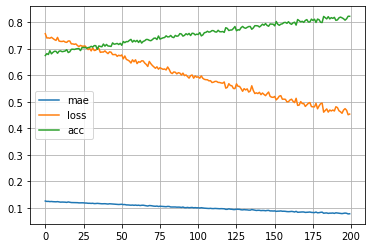

In [62]:
plt.plot(history.history['mae'])
plt.plot(history.history['loss'])
plt.plot(history.history['acc'])
plt.legend(['mae', 'loss', 'acc'])
plt.grid()
plt.show()